In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload `kaggle.json`


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassanmroueh","key":"d754142cf249baf611ffbac53b3b5041"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [3]:
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [01:43<00:00, 22.2MB/s]
100% 2.13G/2.13G [01:43<00:00, 22.0MB/s]


In [6]:
# Unzip the dataset
!unzip leapgestrecog.zip -d /content/leapgestrecog

Streaming output truncated to the last 5000 lines.
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: /content/leapgestrecog/leapgestrecog/leapGest

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3568 - loss: 1.7479 - val_accuracy: 0.6031 - val_loss: 1.4721
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8588 - loss: 0.4637 - val_accuracy: 0.6906 - val_loss: 1.7481
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9830 - loss: 0.0660 - val_accuracy: 0.6656 - val_loss: 2.0912
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9947 - loss: 0.0296 - val_accuracy: 0.6562 - val_loss: 2.1841
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.6562 - val_loss: 2.3835
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.6562 - val_loss: 2.5128
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.6594 - val_loss: 2.6532
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6719 - val_loss: 2.6621
Ep

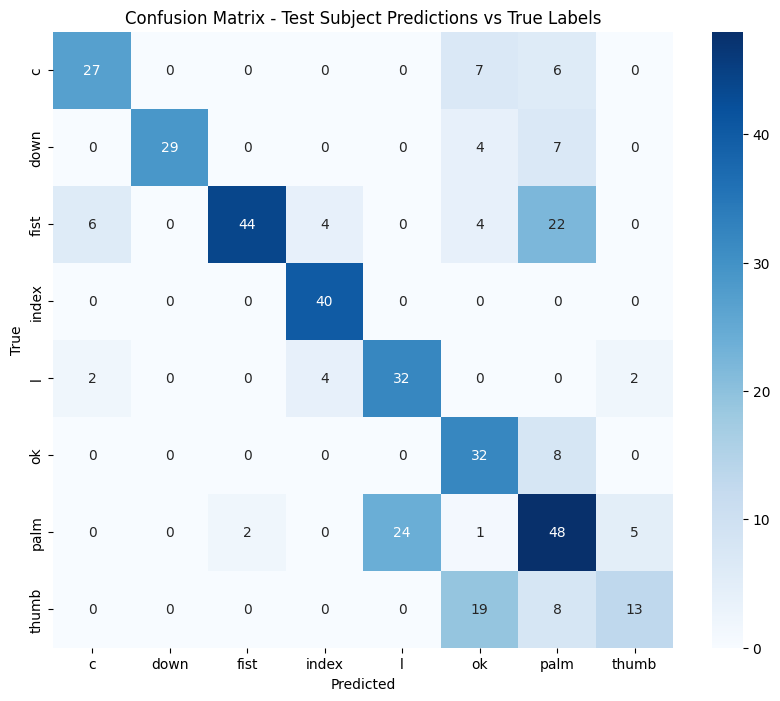

In [19]:
import os
import cv2
import numpy as np
import random
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = '/content/leapgestrecog/leapGestRecog'

# Subjects for training (00 to 07)
training_subjects = ['00', '01', '02', '03', '04', '05', '06', '07']

# Subjects for testing (08, 09)
testing_subjects = ['08', '09']

# Define the number of images to sample per gesture per subject
n_images_per_gesture = 20  # Adjust this as needed to balance between speed and accuracy

def load_images_from_subjects(subjects, n_images_per_gesture):
    images = []
    labels = []

    for subject in subjects:
        subject_folder = os.path.join(dataset_path, subject)

        # Iterate over gesture folders within each subject
        for gesture_folder in os.listdir(subject_folder):
            gesture_path = os.path.join(subject_folder, gesture_folder)
            if os.path.isdir(gesture_path):
                label = gesture_folder.split('_')[1]  # Extract gesture label (e.g., 'palm', 'l', etc.)
                all_images = os.listdir(gesture_path)

                # Randomly sample n_images_per_gesture from the gesture folder
                sampled_images = random.sample(all_images, n_images_per_gesture)

                for image_name in sampled_images:
                    image_path = os.path.join(gesture_path, image_name)
                    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    img_resized = cv2.resize(img, (64, 64))  # Resize to match model input
                    images.append(img_resized)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load training data
train_images, train_labels = load_images_from_subjects(training_subjects, n_images_per_gesture)

# Load testing data
test_images, test_labels = load_images_from_subjects(testing_subjects, n_images_per_gesture)

# Preprocess images (normalize)
train_images = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)

test_images = test_images / 255.0
test_images = np.expand_dims(test_images, axis=-1)

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Build CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data (subject 08 and 09)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels back to original class names
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Evaluate performance using classification report and confusion matrix
print(classification_report(test_labels, predicted_labels_decoded))

# Confusion matrix visualization
cm = confusion_matrix(test_labels, predicted_labels_decoded)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Test Subject Predictions vs True Labels")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


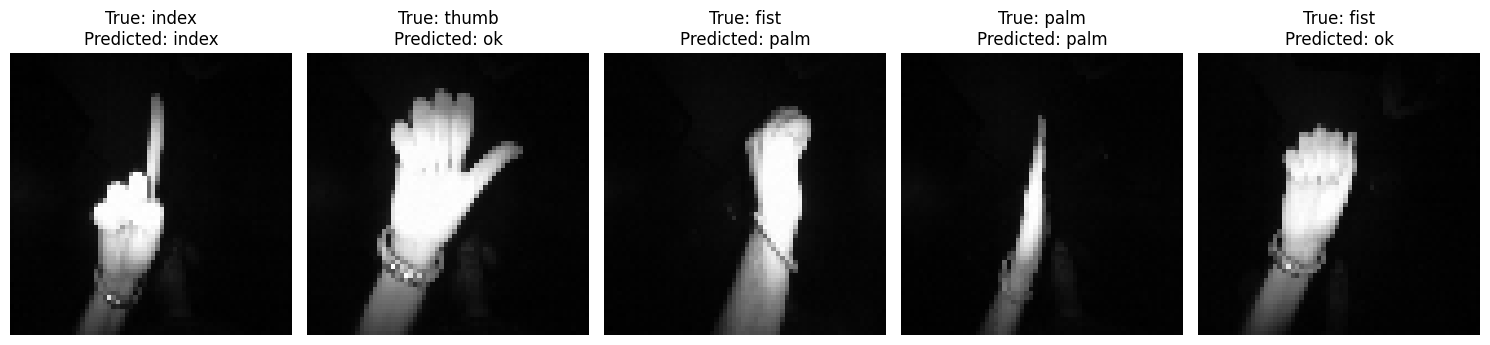

In [20]:
# Visualize some predictions
num_samples_to_visualize = 5  # Adjust as needed

plt.figure(figsize=(15, 5))
for i in range(num_samples_to_visualize):
    index = random.randint(0, len(test_images) - 1)
    image = test_images[index]
    true_label = test_labels[index]
    predicted_label = predicted_labels_decoded[index]

    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(np.squeeze(image), cmap='gray')  # Remove the extra dimension for display
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
# Save the trained model as an .h5 file
model.save('hand_gesture_recognition_model.h5')


In [22]:
from google.colab import files

# Download the model to your local machine
files.download('hand_gesture_recognition_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>